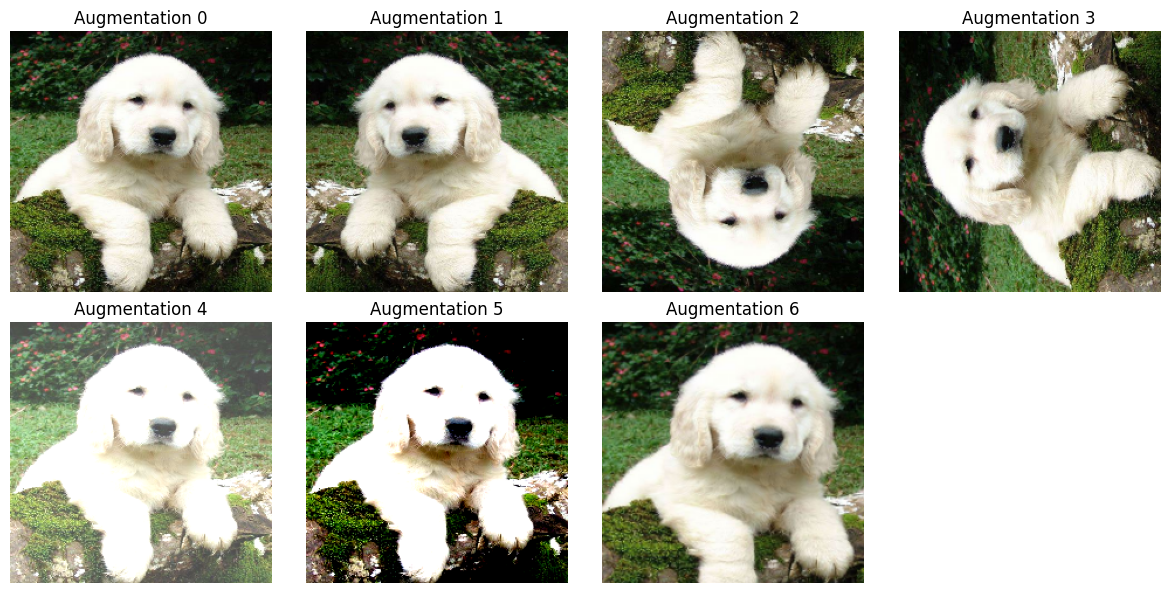

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# Replace this with any image URL from your browser
image_url = "https://th.bing.com/th/id/OSK.404b8d8f3c99b35f0c878d14a2b5f1e3?o=7rm=3&rs=1&pid=ImgDetMain"

# Load image from URL
with urllib.request.urlopen(image_url) as url:
    image_data = url.read()

# Decode and preprocess the image
img = tf.image.decode_jpeg(image_data, channels=3)
img = tf.image.resize(img, [224, 224])
img = tf.cast(img, tf.float32) / 255.0  # Normalize

# Define image augmentations
augmented_images = [
    img,
    tf.image.flip_left_right(img),
    tf.image.flip_up_down(img),
    tf.image.rot90(img),
    tf.image.adjust_brightness(img, 0.3),
    tf.image.adjust_contrast(img, 2.0),
    tf.image.random_crop(tf.image.resize(img, [256, 256]), size=[224, 224, 3])
]

# Display original and augmented images
plt.figure(figsize=(12, 6))
for i, augmented in enumerate(augmented_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(tf.clip_by_value(augmented, 0.0, 1.0))
    plt.axis('off')
    plt.title(f"Augmentation {i}")
plt.tight_layout()
plt.show()
